
### About NFL
The National Football League (NFL) is a professional American football league consisting of 32 teams. The NFL is one of the four major professional sports leagues in North America and the highest professional level of American football in the world. 

Source: [Wikipedia](https://en.wikipedia.org/wiki/National_Football_League)
![NFL](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTZ6EI5slmj172qfcN4dTNKqEllvxJ1w5ARNo4sso0xVS5-qhu6)

### Rules of NFL
If you are a newbie (just like me) to the world of NFL, there you can read about the basics from this discussion [thread](https://www.kaggle.com/c/nfl-big-data-bowl-2020/discussion/111945#latest-645419). 

### Competition Objective
In the National Football League (NFL), roughly a third of teams’ offensive yardage comes from run plays. A running play or rushing play is a tactic in which the football is advanced up the field by a player running it rather than passing it. Competition is to develop a model to predict how many yards a team will gain on given rushing plays as they happen. We are given the data when the ball is handed off (TimeHandoff) to forecast the yardage gained on that play.

### Notebook objective
Objective of the notebook is to explore the data and find some interesting insights along the way.

### References:
This [wonderful kernel](https://www.kaggle.com/robikscube/nfl-big-data-bowl-plotting-player-position) by Rob is the basis for this notebook

Let us first look at the top few rows to understand the data.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches
pd.set_option('max_columns', 100)

data_path = "/kaggle/input/nfl-big-data-bowl-2020/"
train_df = pd.read_csv(data_path + "train.csv", low_memory=False)
train_df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


Let us first get to understand some basic information about the data.

In [2]:
print(f"The total number of games in the training data is {train_df['GameId'].nunique()}")
print(f"The total number of plays in the training data is {train_df['PlayId'].nunique()}")
print(f"The NFL seasons in the training data are {train_df['Season'].unique().tolist()}")

The total number of games in the training data is 512
The total number of plays in the training data is 23171
The NFL seasons in the training data are [2017, 2018]


## Target Variable Analysis

Now let us analyze the target variable (Yards) and see how it is distributed.

In [3]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

temp_df = train_df.query("NflIdRusher == NflId")
fig = px.histogram(temp_df, x="Yards")

layout = go.Layout(
    title=go.layout.Title(
        text="Distribution of Yards (Target)",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)
fig.update_layout(layout)
fig.show()

* 2 Yards has the maximum count followed by 1 and 3 yards
* The distribution looks normal with a right skewness. There are some extreme right values which means the player has covered more than 80 yards.

### Football Field Plot

Thanks to Rob Mulla for this [wonderful code](https://www.kaggle.com/robikscube/nfl-big-data-bowl-plotting-player-position) to create the plot of football field

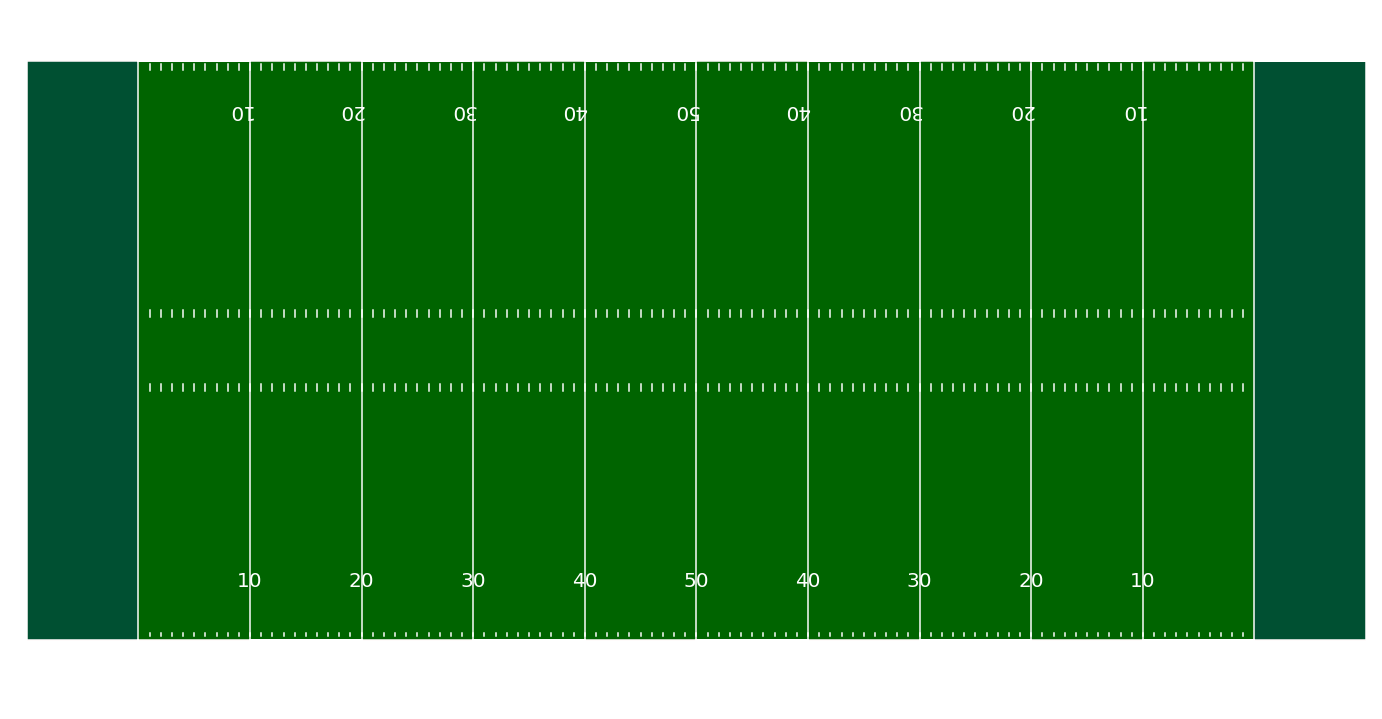

In [4]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12*2, 6.33*2)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()

## Ball Carrier Direction Analysis

Competition organizer in [this thread](https://www.kaggle.com/c/nfl-big-data-bowl-2020/discussion/111918#latest-645404) has mentioned that *"One of the most crucial features to analyzing run play success is likely the amount of space that the ball carrier had available when he received the ball"*

So let us explore that first in our EDA. Let us take the playid '20181007011551' to start with. 
* We will plot the home team using blue color and away team using orange color.
* Ball carrier is plotted using red color
* Direction of movement of the ball carrier is shown using arrow
* Yards covered (target) variable is available in the title

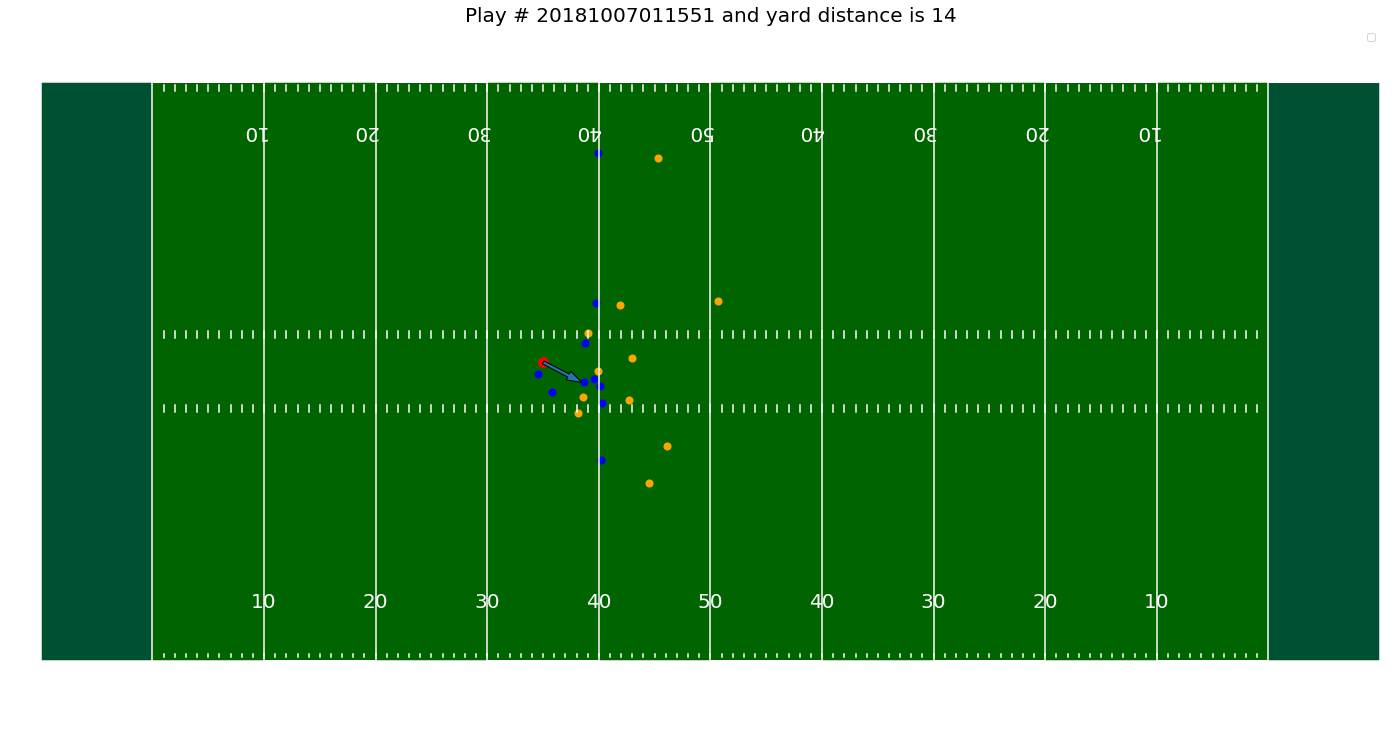

In [5]:
import math
def get_dx_dy(angle, dist):
    cartesianAngleRadians = (450-angle)*math.pi/180.0
    dx = dist * math.cos(cartesianAngleRadians)
    dy = dist * math.sin(cartesianAngleRadians)
    return dx, dy

play_id = 20181007011551
fig, ax = create_football_field()
train_df.query("PlayId == @play_id and Team == 'away'") \
    .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=50, legend='Away')
train_df.query("PlayId == @play_id and Team == 'home'") \
    .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=50, legend='Home')
train_df.query("PlayId == @play_id and NflIdRusher == NflId") \
    .plot(x='X', y='Y', kind='scatter', ax=ax, color='red', s=100, legend='Rusher')
rusher_row = train_df.query("PlayId == @play_id and NflIdRusher == NflId")
yards_covered = rusher_row["Yards"].values[0]

x = rusher_row["X"].values[0]
y = rusher_row["Y"].values[0]
rusher_dir = rusher_row["Dir"].values[0]
rusher_speed = rusher_row["S"].values[0]
dx, dy = get_dx_dy(rusher_dir, rusher_speed)

ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.3)
plt.title(f'Play # {play_id} and yard distance is {yards_covered}', fontsize=20)
plt.legend()
plt.show()

In [6]:
rusher_dir

118.11

### Direction of Ball Carrier during Negative Yards 

Let us take some plays where the yard distance is negative and see if there are any patterns that we can see.

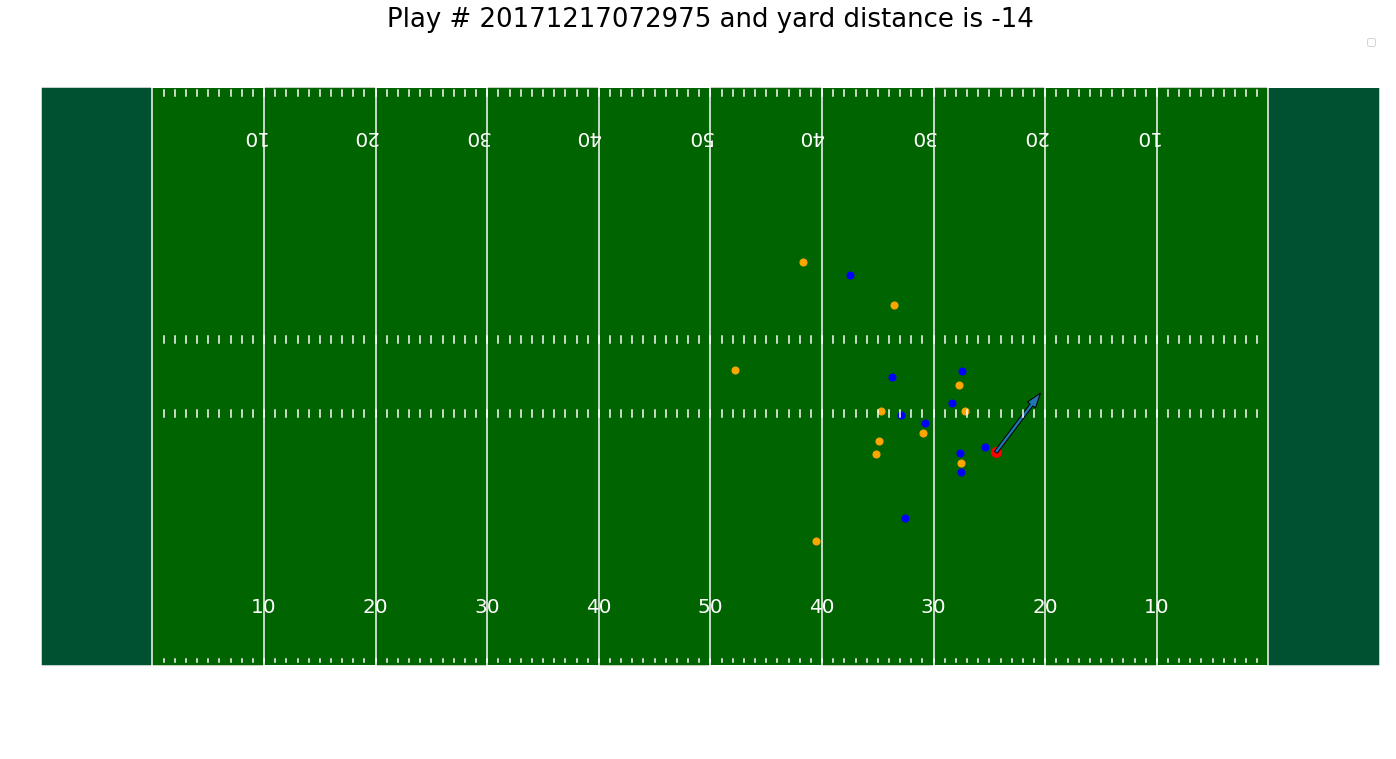

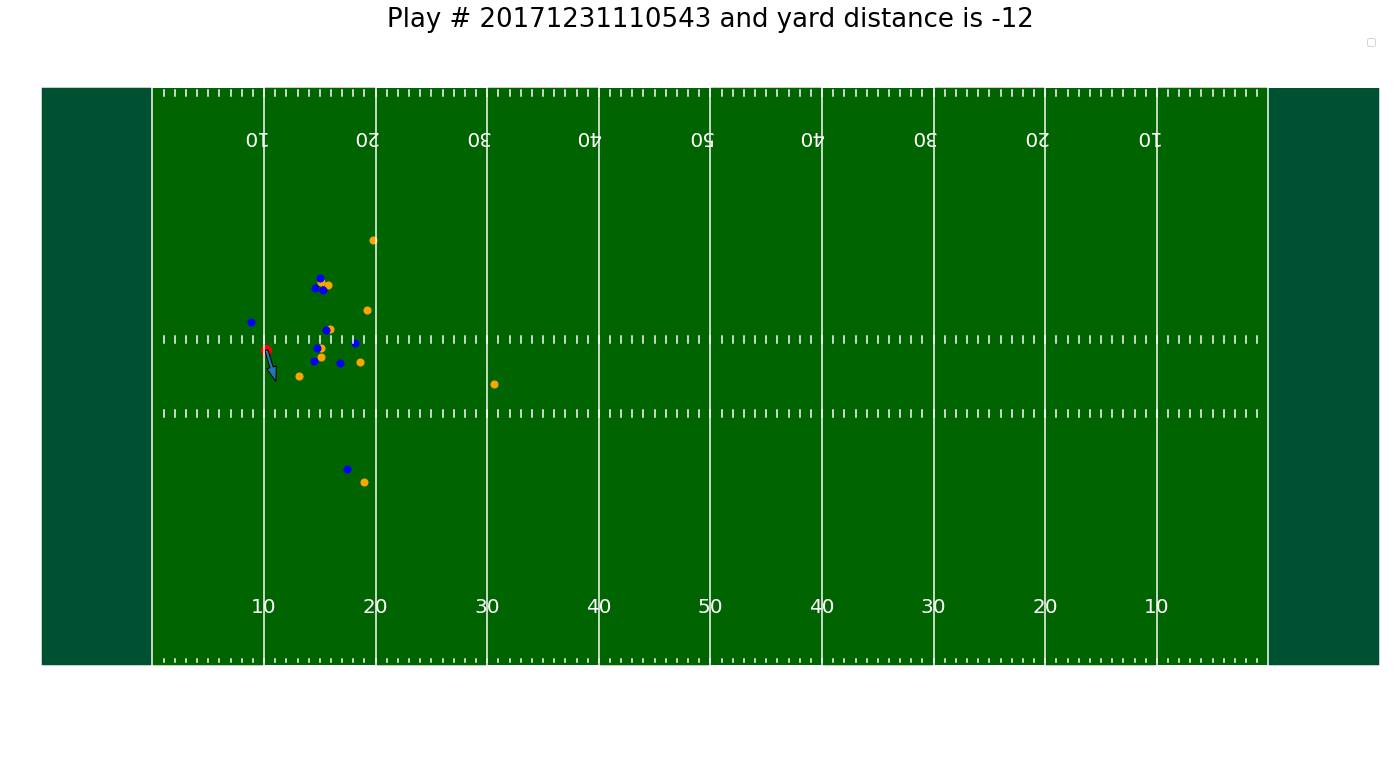

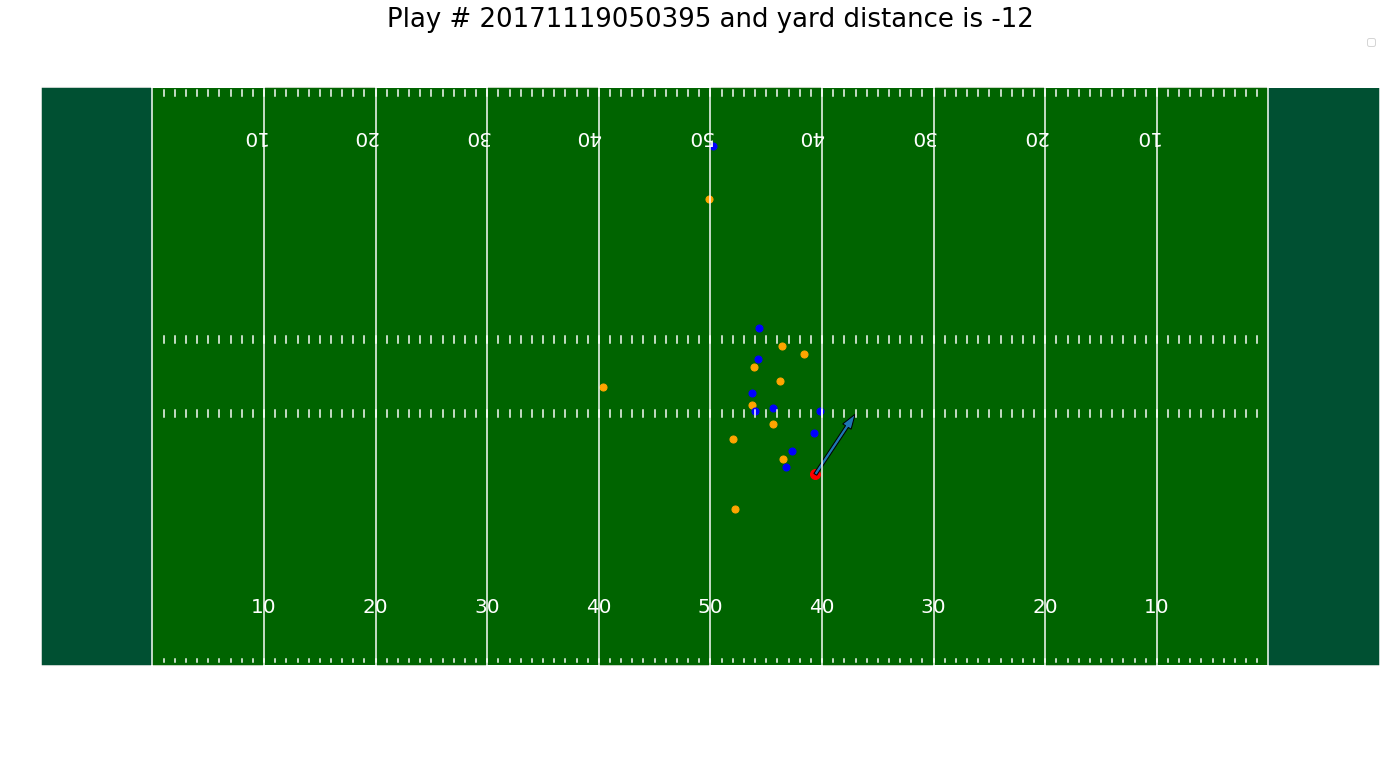

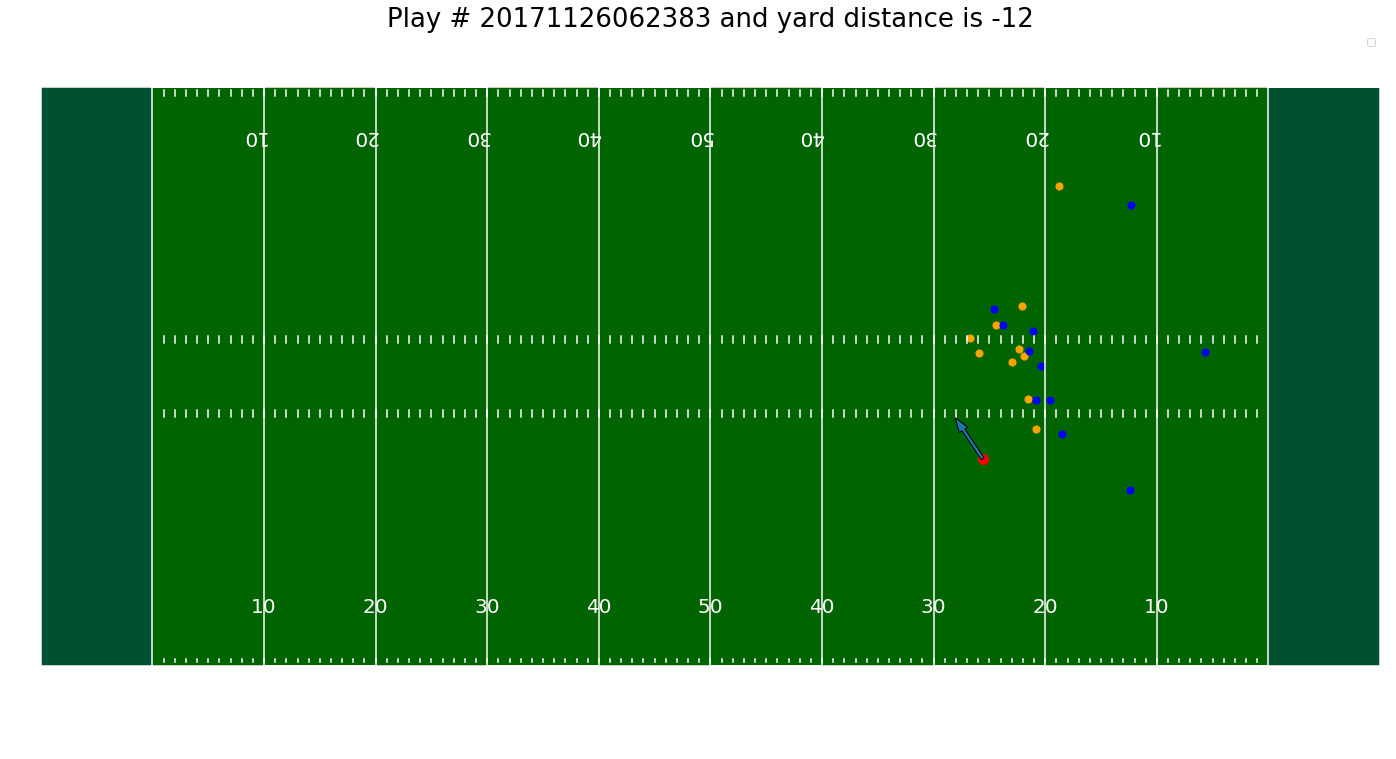

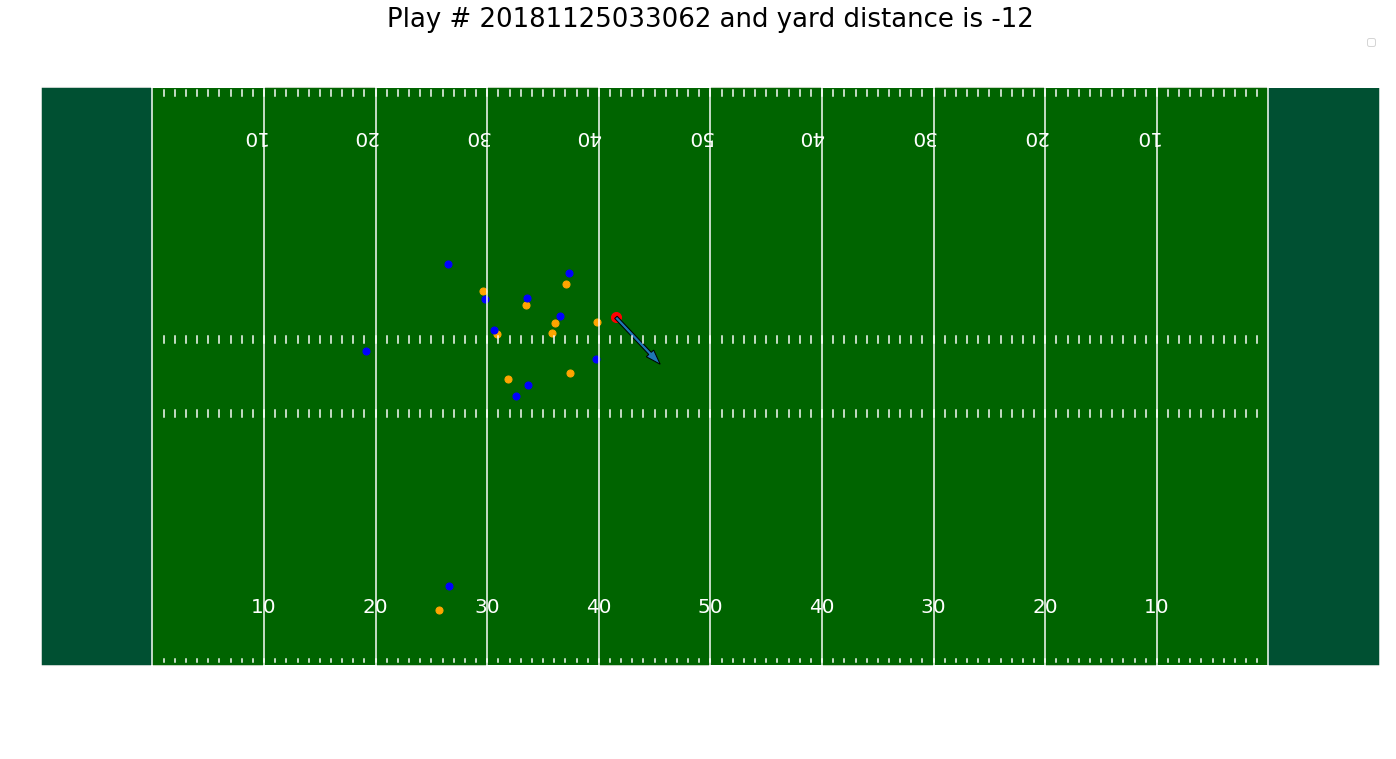

In [7]:
def get_plot(play_id):
    fig, ax = create_football_field()
    train_df.query("PlayId == @play_id and Team == 'away'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=50, legend='Away')
    train_df.query("PlayId == @play_id and Team == 'home'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=50, legend='Home')
    train_df.query("PlayId == @play_id and NflIdRusher == NflId") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='red', s=100, legend='Rusher')
    rusher_row = train_df.query("PlayId == @play_id and NflIdRusher == NflId")
    yards_covered = rusher_row["Yards"].values[0]

    x = rusher_row["X"].values[0]
    y = rusher_row["Y"].values[0]
    rusher_dir = rusher_row["Dir"].values[0]
    rusher_speed = rusher_row["S"].values[0]
    dx, dy = get_dx_dy(rusher_dir, rusher_speed)

    ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.3)
    plt.title(f'Play # {play_id} and yard distance is {yards_covered}', fontsize=26)
    plt.legend()
    return plt

temp_df = train_df.groupby("PlayId").first()
temp_df = temp_df.sort_values(by="Yards").reset_index().head(5)

for play_id in temp_df["PlayId"].values:
    plt = get_plot(play_id)
    plt.show()

We could clearly see that most of the times the ball carrier moved in the opposite direction of the game and so the yards are negative.

### Direction of Ball Carrier during Zero Yards

Now let us take some plays where the distance covered is zero yards and plot them.

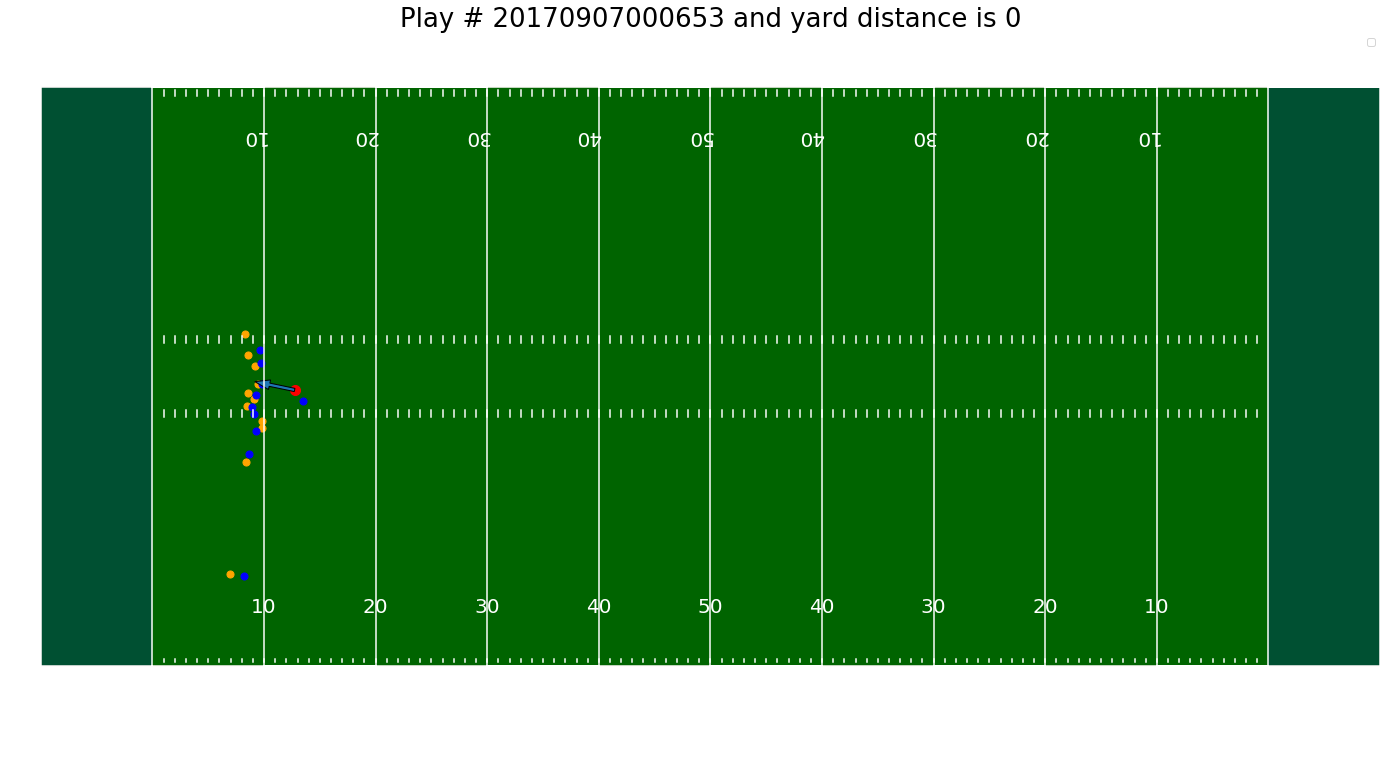

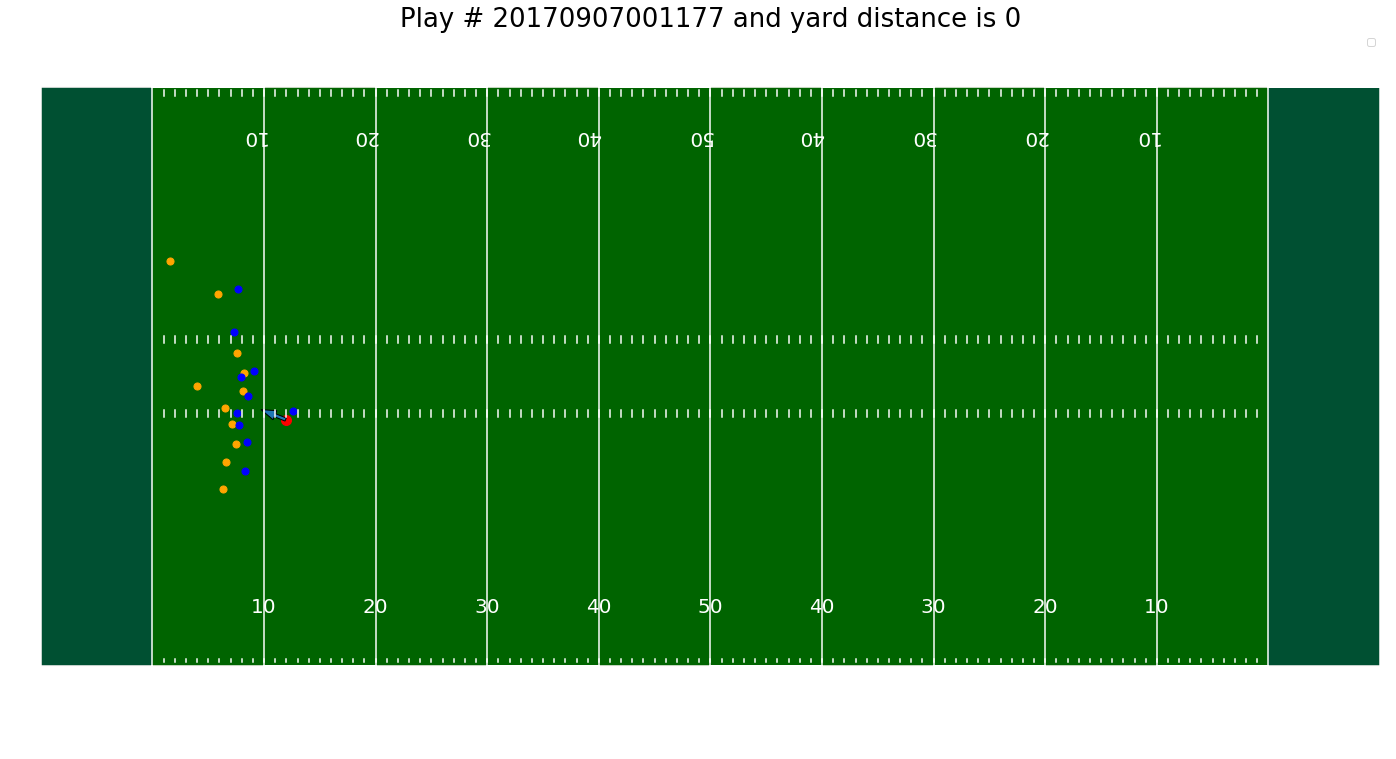

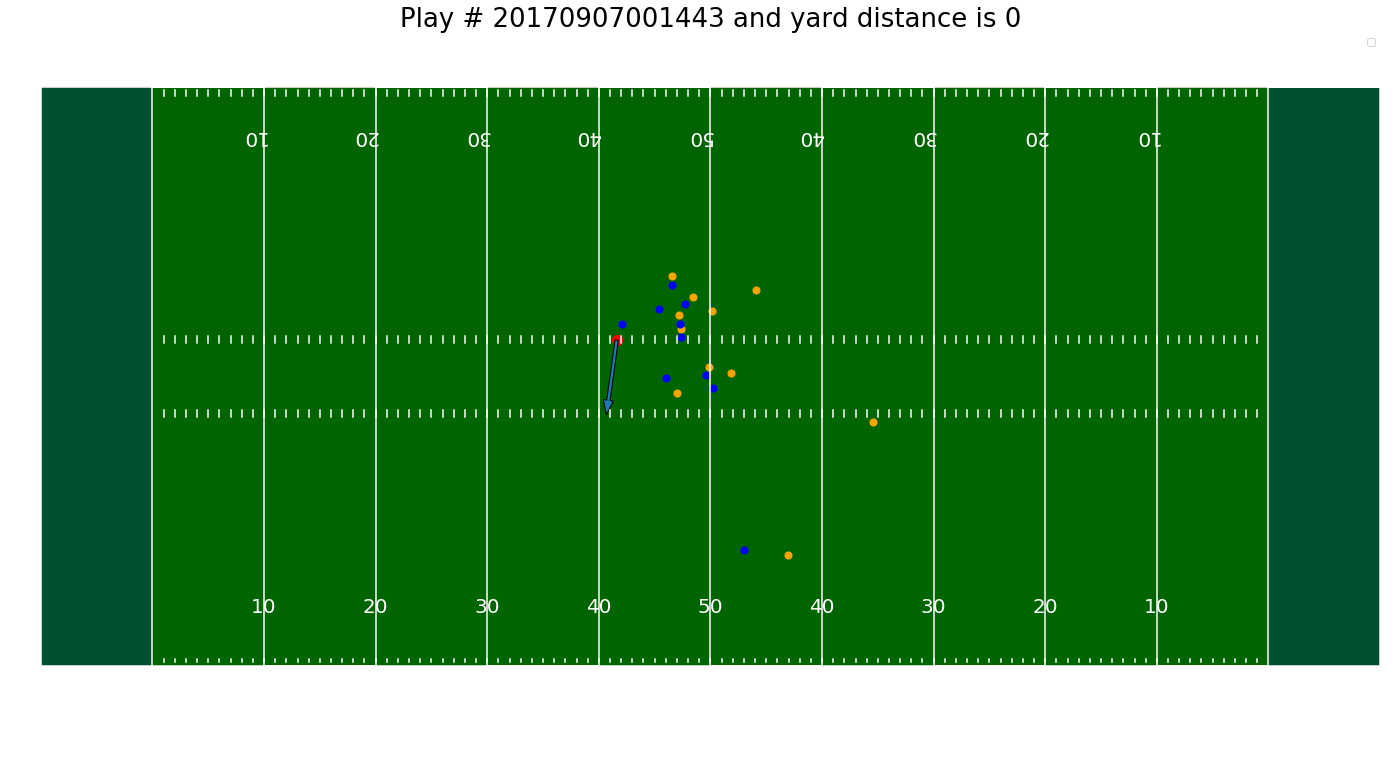

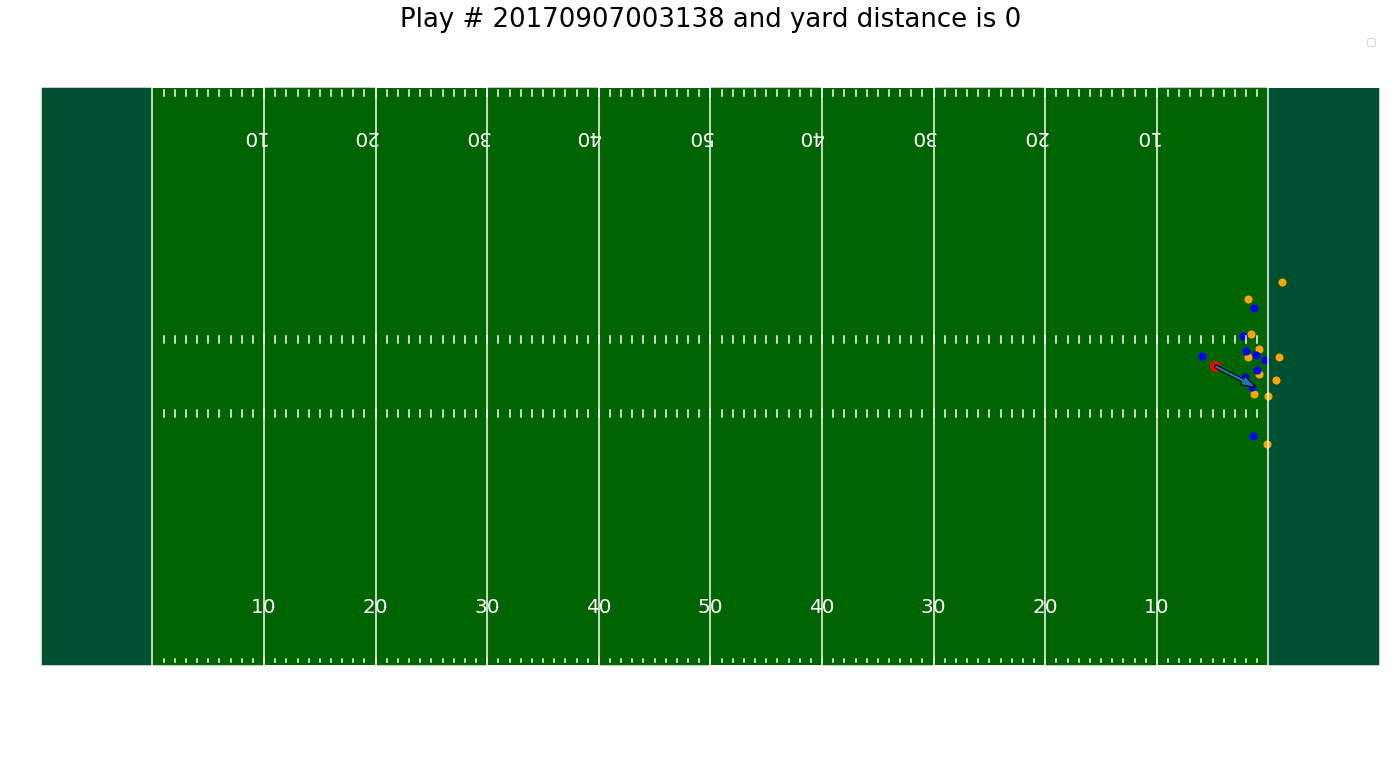

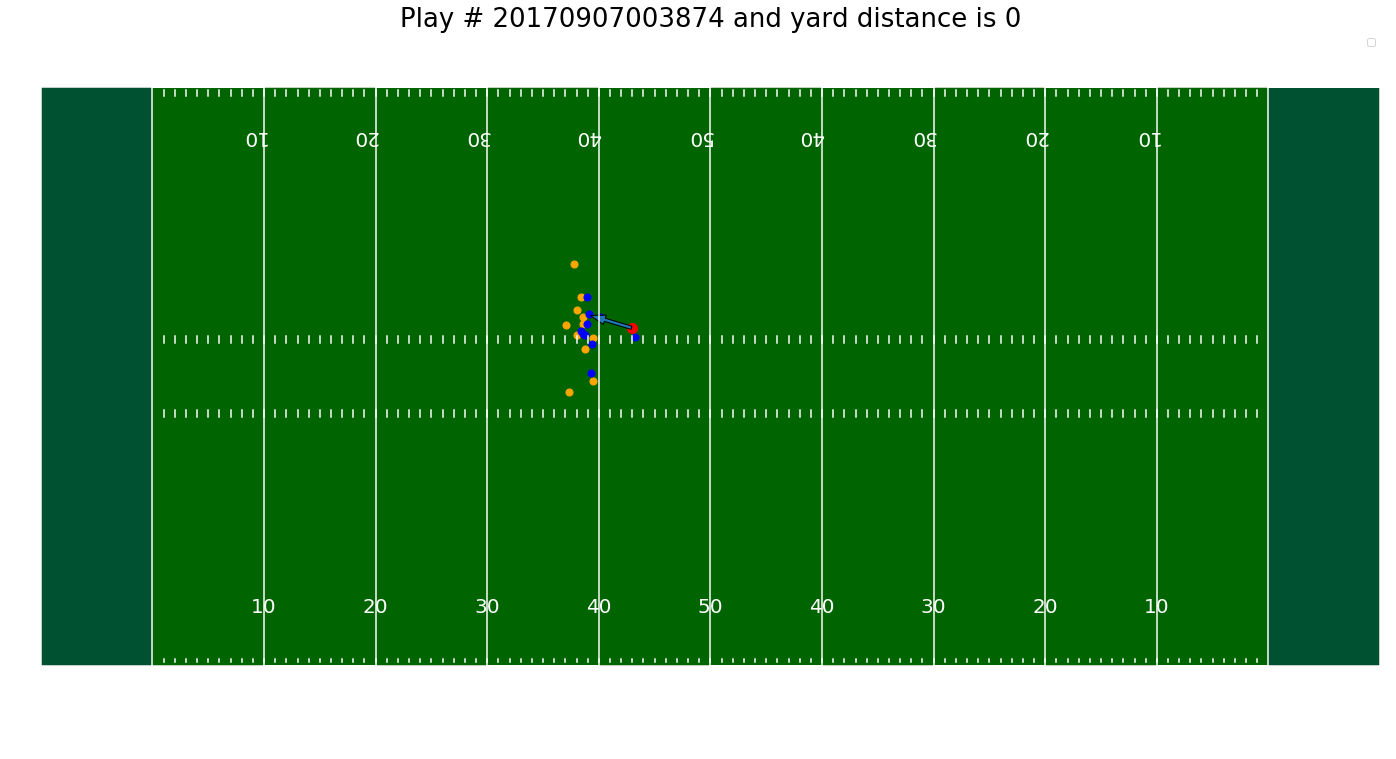

In [8]:
temp_df = train_df.groupby("PlayId").first()
temp_df = temp_df[temp_df["Yards"]==0].reset_index().head(5)

for play_id in temp_df["PlayId"].values:
    plt = get_plot(play_id)
    plt.show()

Hmmm. Most of the times, the ball carrier is moving towards the center of the opposition. 

### Direction of Ball Carrier during High Positive Yards Coverage


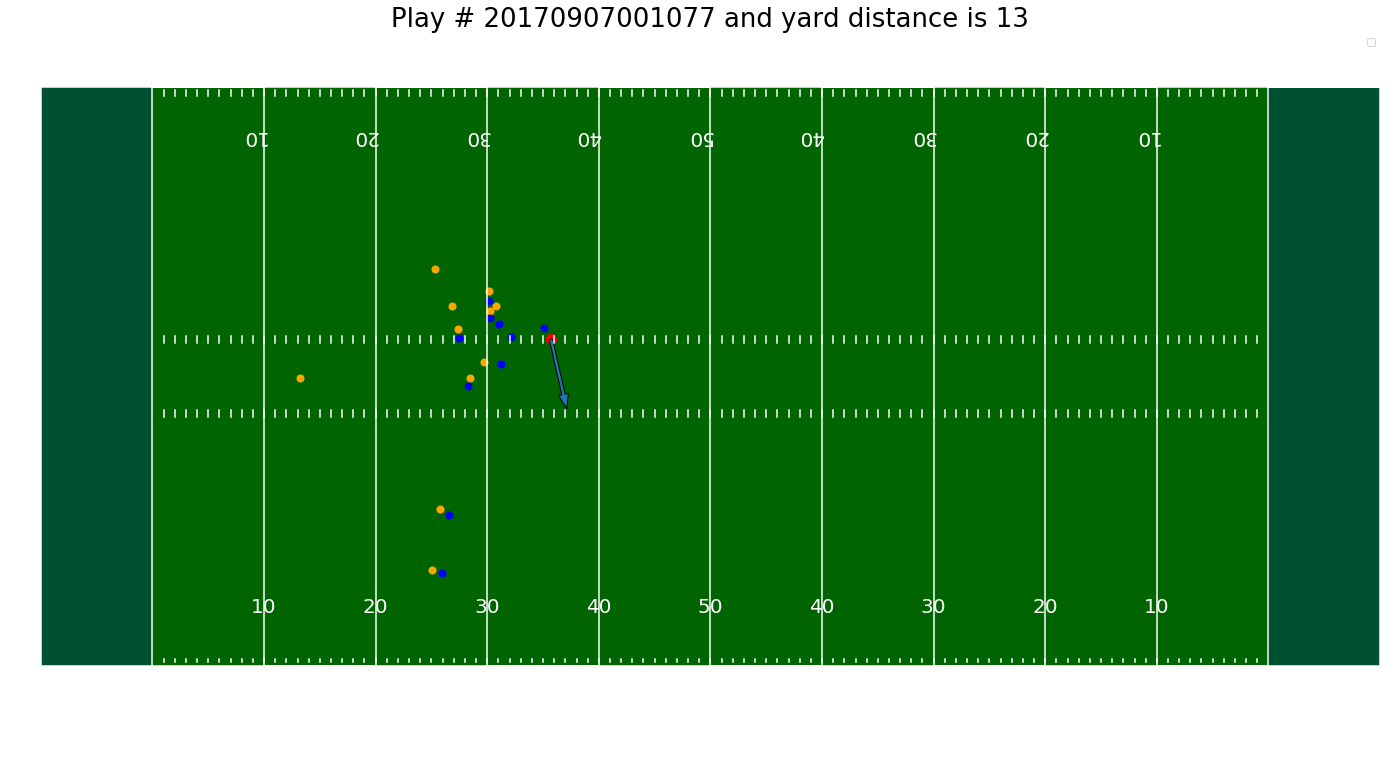

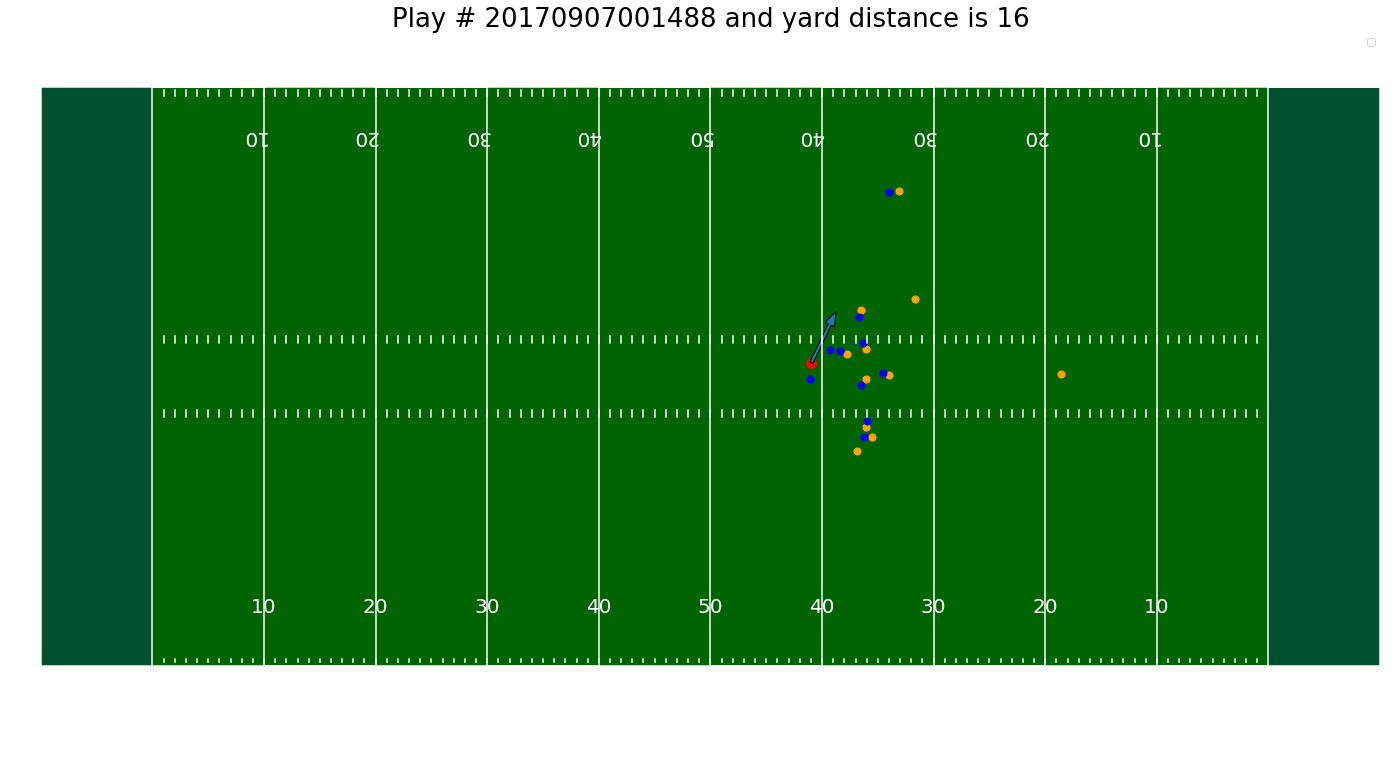

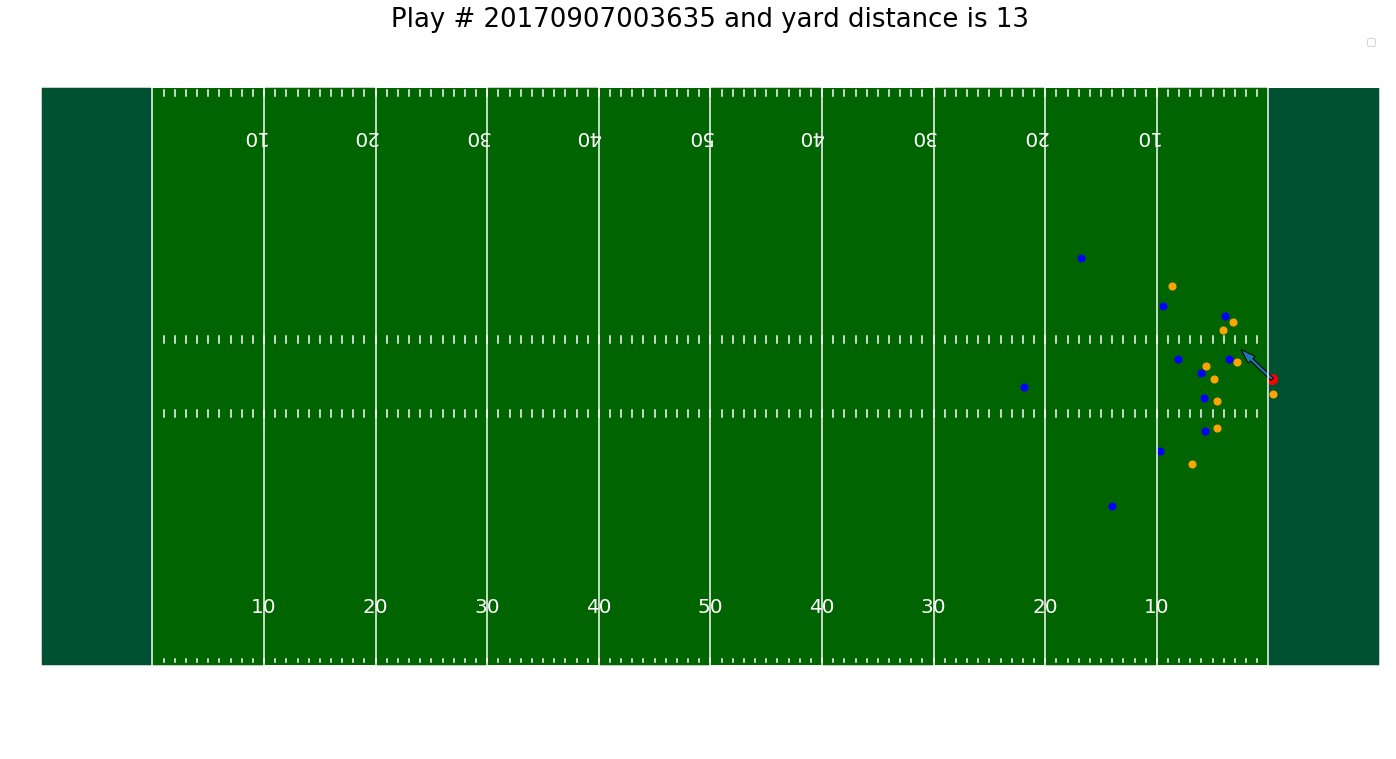

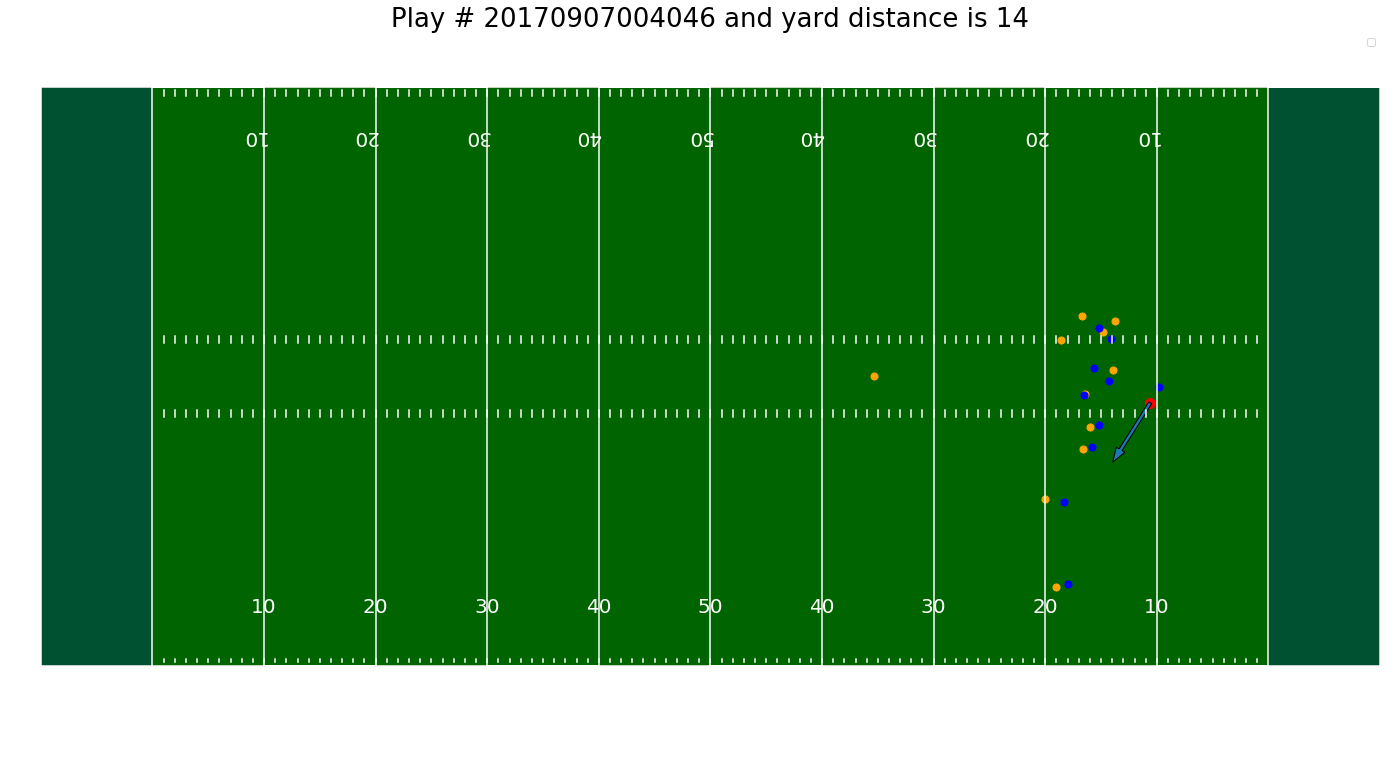

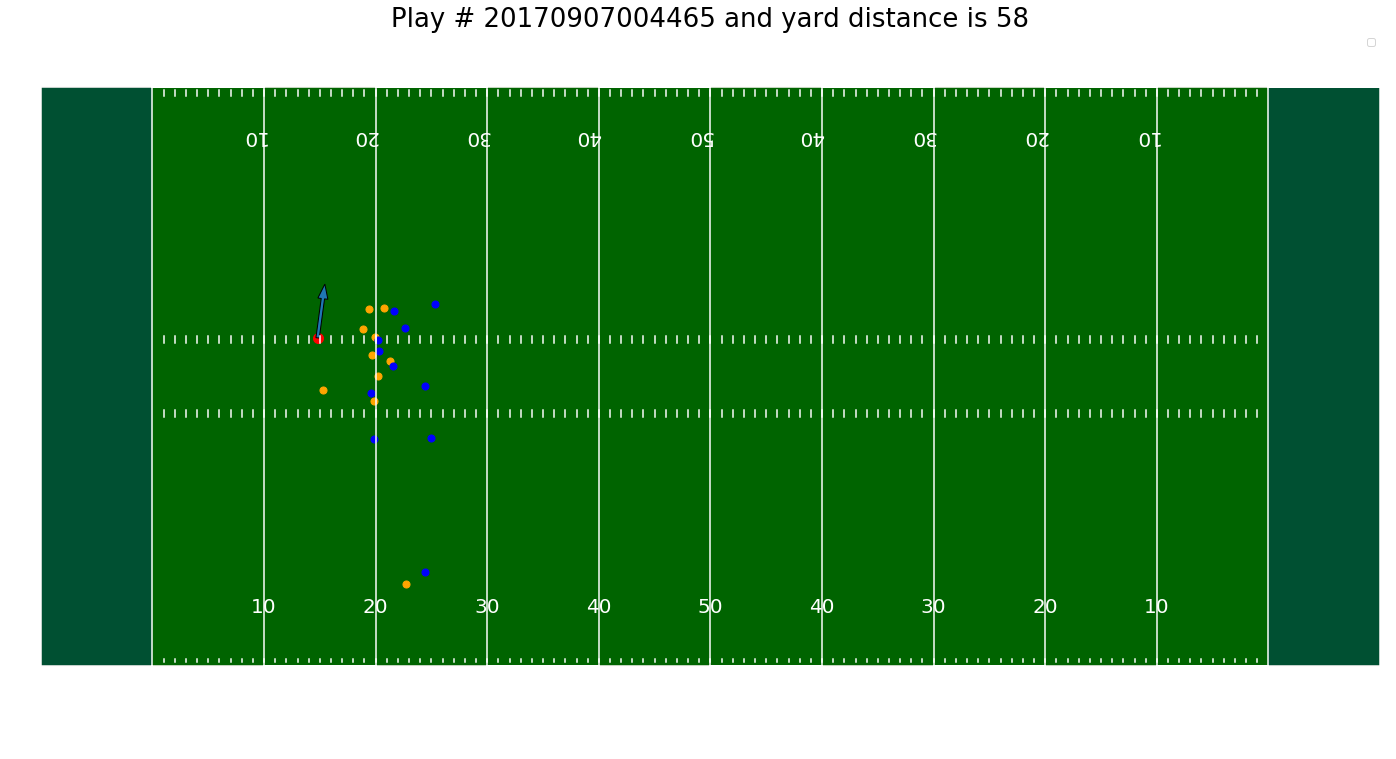

In [9]:
temp_df = train_df.groupby("PlayId").first()
temp_df = temp_df[temp_df["Yards"]>10].reset_index().head(5)

for play_id in temp_df["PlayId"].values:
    plt = get_plot(play_id)
    plt.show()

It looks like the ball carrier tries to move away from the opposition team towards a gap so as to move forward gaining more yards.

## Distance Covered by the Rusher at TimeHandoff 

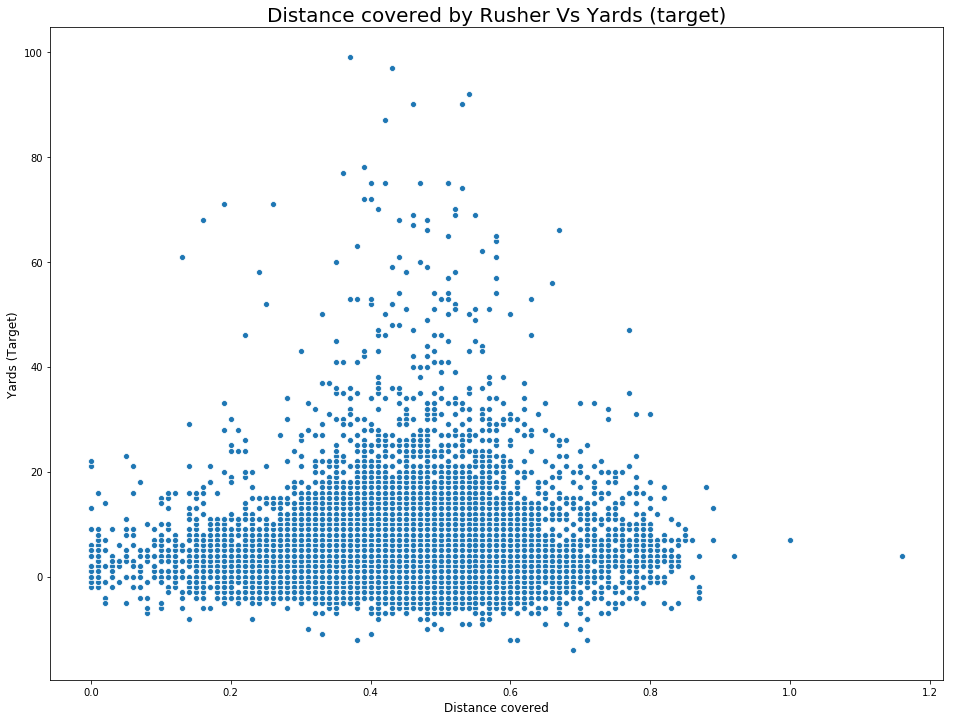

In [10]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.scatterplot(temp_df["Dis"], temp_df["Yards"])
plt.xlabel('Distance covered', fontsize=12)
plt.ylabel('Yards (Target)', fontsize=12)
plt.title("Distance covered by Rusher Vs Yards (target)", fontsize=20)
plt.show()

We can see a nice increasing trend in the yards gained by the rusher as the distance travelled by the rusher increases from zero. Then it starts decreasing which indicates that too much distance covered before the handoff of the ball also affects the yards gained.

## Speed of the Rusher at TimeHandoff 

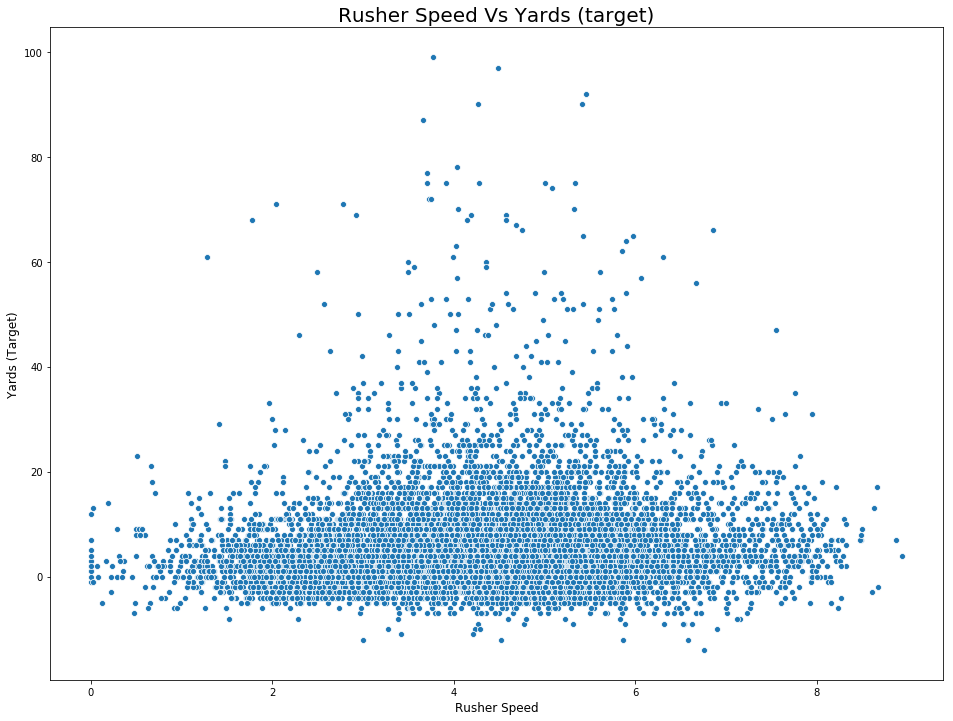

In [11]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.scatterplot(temp_df["S"], temp_df["Yards"])
plt.xlabel('Rusher Speed', fontsize=12)
plt.ylabel('Yards (Target)', fontsize=12)
plt.title("Rusher Speed Vs Yards (target)", fontsize=20)
plt.show()

Speed also shows a trend similar to distance covered. 2 to 6 yards per second seem to be a better speed for yards covered.

## Rusher Acceleration at TimeHandOff

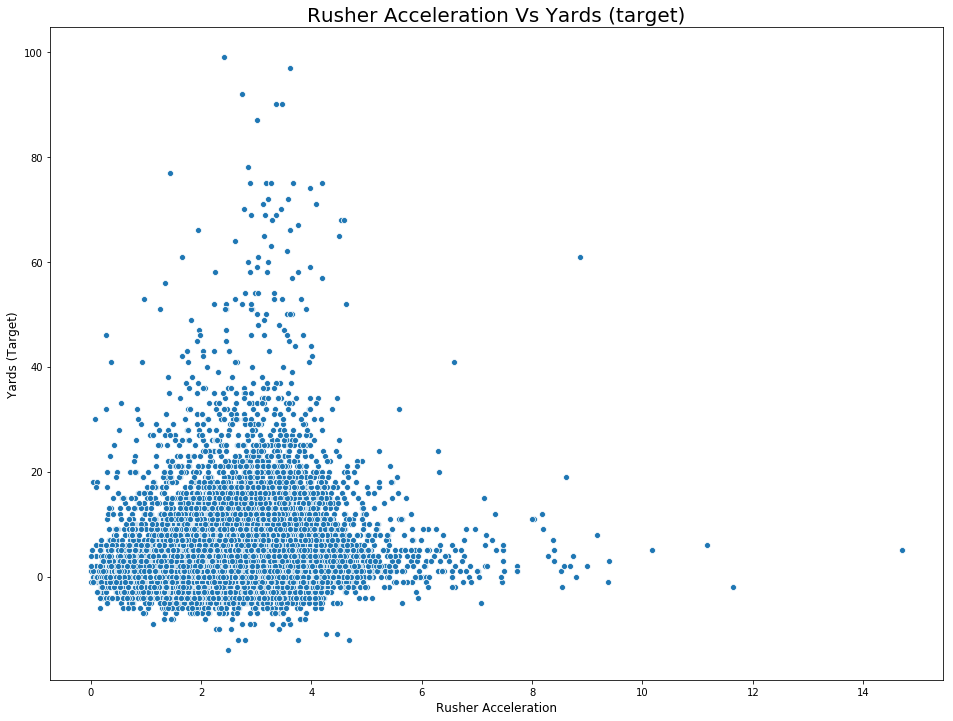

In [12]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.scatterplot(temp_df["A"], temp_df["Yards"])
plt.xlabel('Rusher Acceleration', fontsize=12)
plt.ylabel('Yards (Target)', fontsize=12)
plt.title("Rusher Acceleration Vs Yards (target)", fontsize=20)
plt.show()

Acceleration also shows a similar trend as that of distance and speed. 

## Position of the Rusher / Ball Carrier

Let us now see how the position of the rusher affects the yards gained

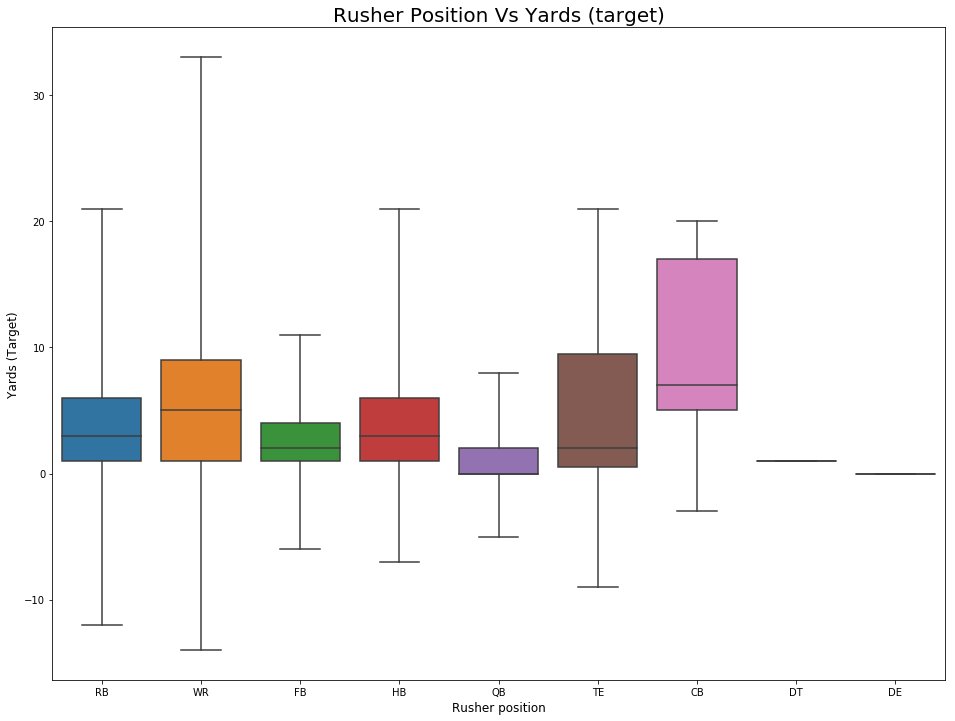

In [13]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, x="Position", y="Yards", showfliers=False, whis=3.0)
plt.xlabel('Rusher position', fontsize=12)
plt.ylabel('Yards (Target)', fontsize=12)
plt.title("Rusher Position Vs Yards (target)", fontsize=20)
plt.show()

* Position CB has the highest median of yards gained followed by Wide Receiver

## Number of Defenders in the Box

Now let us see how the number of defenders in the box affects the target

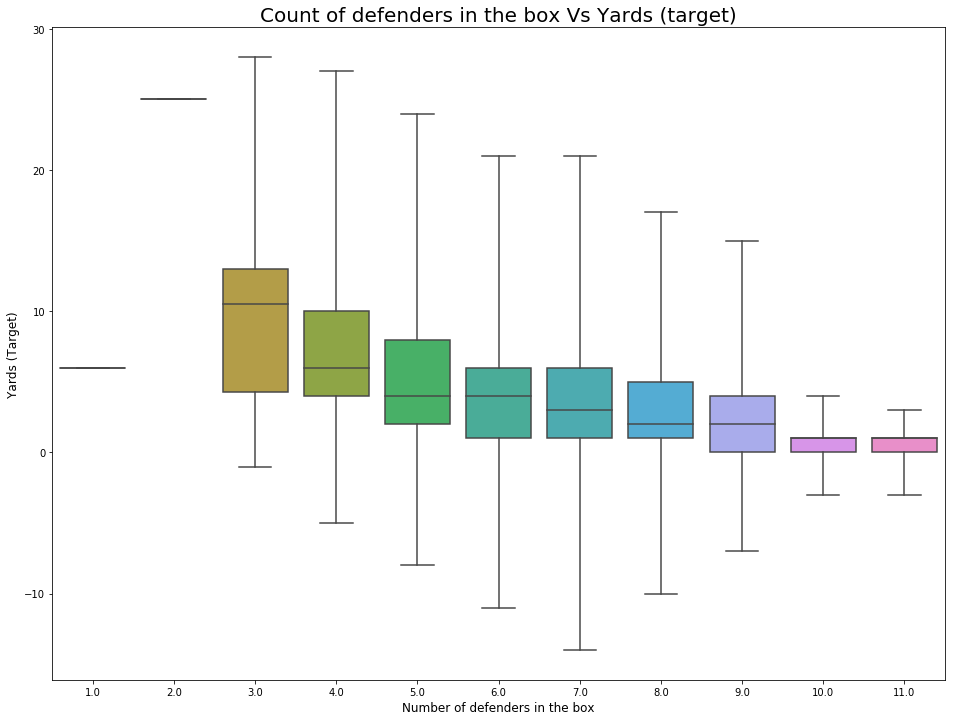

In [14]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, x="DefendersInTheBox", y="Yards", showfliers=False, whis=3.0)
plt.xlabel('Number of defenders in the box', fontsize=12)
plt.ylabel('Yards (Target)', fontsize=12)
plt.title("Count of defenders in the box Vs Yards (target)", fontsize=20)
plt.show()

We can see a nice decrease in the median value of the yards gained by the rusher with the increase in the number of defenders in the box.

## Down Number Vs Yards

Let us now check how the yards gained vary with respect to down number.

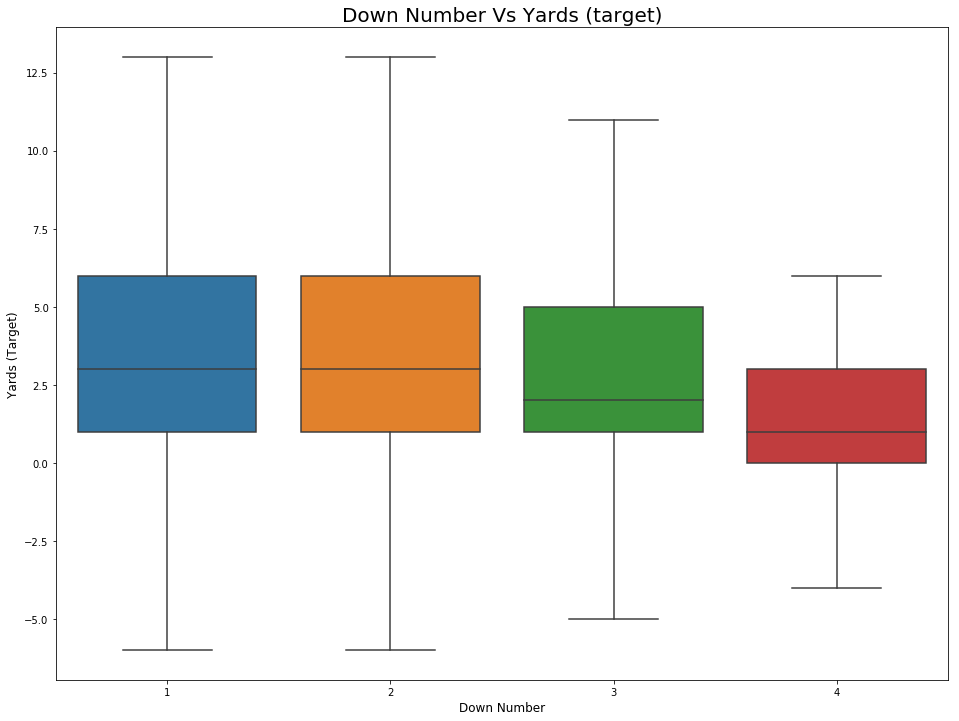

In [15]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, x="Down", y="Yards", showfliers=False)
plt.xlabel('Down Number', fontsize=12)
plt.ylabel('Yards (Target)', fontsize=12)
plt.title("Down Number Vs Yards (target)", fontsize=20)
plt.show()

We can see a decrease in the median value of the target with an increase in the down number from 1 to 4.

## Possession Team Vs Yards

Now let us see the distribution of yards based on the team

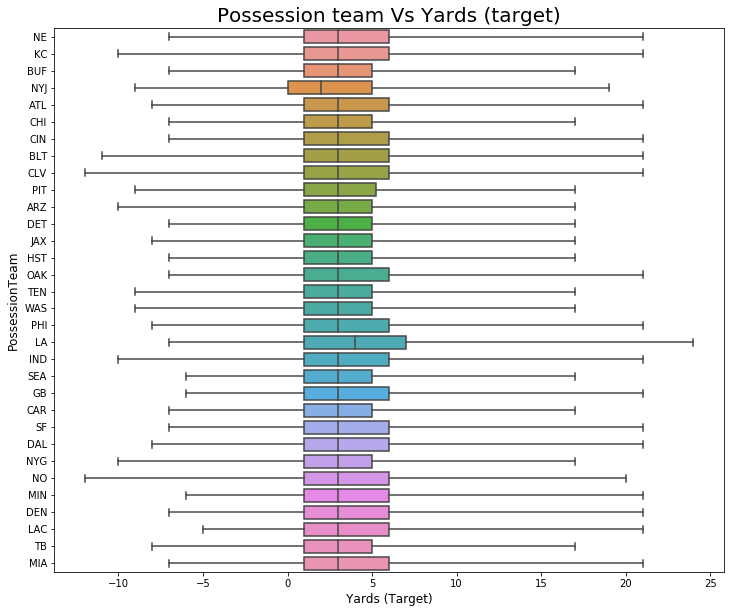

In [16]:
plt.figure(figsize=(12,10))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, y="PossessionTeam", x="Yards", showfliers=False, whis=3.0)
plt.ylabel('PossessionTeam', fontsize=12)
plt.xlabel('Yards (Target)', fontsize=12)
plt.title("Possession team Vs Yards (target)", fontsize=20)
plt.show()

* LA team seems to have higher median yards value than the rest.
* NYJ team seems to have lower median yards value than the rest.

## Quarter Vs Yards

<Figure size 1152x864 with 0 Axes>

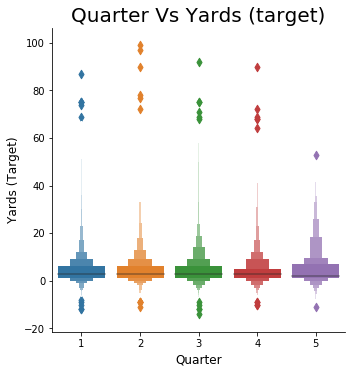

In [17]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.catplot(data=temp_df, x="Quarter", y="Yards", kind="boxen")
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Yards (Target)', fontsize=12)
plt.title("Quarter Vs Yards (target)", fontsize=20)
plt.show()

This is a slight variation of box plot with more quantile details. More details about the plot can be seen [here](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot).

**More to come. Stay tuned!**